# Deep Learning from Scratch using Python 

Seth Weidman

11/04/2017

In [1]:
# import tensorflow as tf

#### Hide

In [2]:
from IPython.display import Image
Image(url='https://gph.is/1xK7p6m')

# Outline

This talk will have two parts:

## Neural Nets from Scratch

1. We'll implement a basic neural net with one hidden layer, from scratch, and use mathematical principles to get the backpropogation right.
2. We'll show that this same framework can be used to learn MNIST.

## Transitioning to Deep Learning

1. We'll transition to Deep Learning by changing our mental model of neural nets to be that they contain "layers" which pass information backwards and forwards between them. 
2. We'll show how this framework can be used to construct arbitrarily deep neural networks, and show how these can learn MNIST.

# Neural Nets from Scratch:

We've all seen diagrams like the following in the context of neural nets:

<img src='img/neural_net_basic.png' height=200>

Many don't fully understand what is going on in this diagram. This talk will attempt to rectify that.

# Let's learn MNIST

## Let's learn MNIST

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
mnist = fetch_mldata('MNIST original') 

## Let's learn MNIST

In [4]:
def get_mnist_X_Y(mnist):
    data = mnist.data
    X = (data - data.min()) * 1.0 / (data.max() - data.min())
    target = mnist.target
    Y = np.zeros((len(target), 10))
    for i in range(len(target)):
        Y[i][int(target[i])] = 1 
    print("Number of images: ", X.shape[0])
    return X, Y

In [5]:
X, Y = get_mnist_X_Y(mnist)

Number of images:  70000


In [6]:
train_prop = 0.9
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=1-train_prop, 
    random_state=823)

# Neural net, step by step

## Neural net, step by step

Step 1: Randomly shuffle the images in the training set

In [7]:
np.random.seed(823)
train_size = X_train.shape[0]
indices = list(range(train_size))
np.random.shuffle(indices)

In [8]:
i = indices[0]

## Neural net, step by step

Let's just visualize an image:

In [9]:
def visualize_image(index):
    target = mnist.target
    print("Label: ", int(target[index]))
    plt.imshow(1.0 - X[index].reshape(28,28), cmap='gray')
    plt.show() 

Label:  7


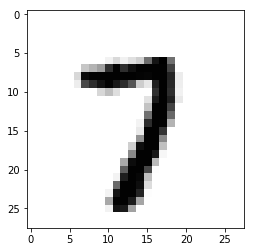

In [10]:
visualize_image(i)

In [11]:
x = np.array(X[i], ndmin=2)

## Neural net, step by step

Step 2: multiply this image by the first set of weights:

In [12]:
V = np.random.randn(784, 50)

In [13]:
A = np.dot(x,V)

Now, we have transformed the 784 dimensional images into 50 "hidden features".

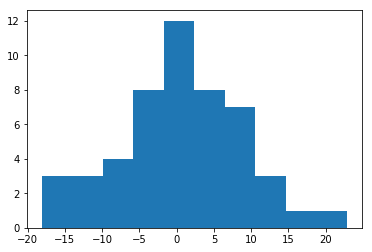

In [14]:
plt.hist(A[0]);

## Neural net, step by step

**An intuition of what matrix multiplication does.**

Let's say that each observation had three features $x_1$, $x_2$, and $x_3$, and we wanted to transform these three features into four hidden features, $a_1$, $a_2$, $a_3$, and $a_4$. How would we do this?

Since we're transforming three features into four features, we'll use a 3 x 4 matrix to do this:

$$ V = \begin{bmatrix}v_{11} & v_{12} & v_{13} & v_{14} \\
                      v_{21} & v_{22} & v_{23} & v_{24} \\
                      v_{31} & v_{32} & v_{33} & v_{34}
                      \end{bmatrix} $$

## Neural net, step by step

And we would actually do the transformation as follows:

$$ x_1 * v_{11} + x_2 * v_{21} + x_3 * v_{31} = a_1 $$
$$ x_1 * v_{12} + x_2 * v_{22} + x_3 * v_{32} = a_2 $$
$$ x_1 * v_{13} + x_2 * v_{23} + x_3 * v_{33} = a_3 $$
$$ x_1 * v_{14} + x_2 * v_{24} + x_3 * v_{34} = a_4 $$

This shows concretely that _each one of the hidden features is just a linear combination of the original features of your data_.

## Neural net, step by step

**Step 3: feed these hidden features through the sigmoid**

Refresher on the sigmoid

In [15]:
def _sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

## Neural net, step by step

If we only had four hidden features, the transformation would simply be:

$$ B = \sigma(A) $$ or

$$ b_1 = \sigma(a_1) $$
$$ b_2 = \sigma(a_2) $$
$$ b_3 = \sigma(a_3) $$
$$ b_4 = \sigma(a_4) $$

In [16]:
B = _sigmoid(A)

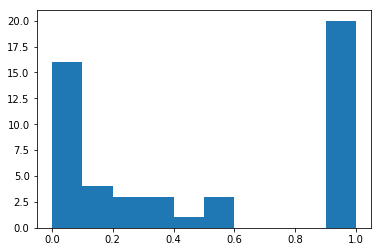

In [17]:
plt.hist(B[0]);

## Neural net, step by step

**Step 4: multiply these sigmoided results by another matrix**

In [18]:
W = np.random.randn(50, 10)
C = np.dot(B,W)

In [19]:
C[0]

array([ 5.32173838,  4.48708933, -0.52809276, -1.5385258 , -4.06721213,
       -4.92498599,  4.03298422, -6.1132646 ,  4.78575185, -7.36306028])

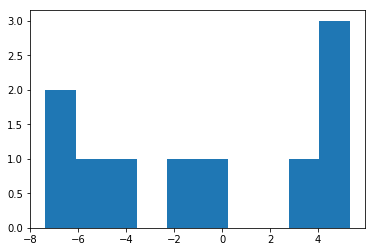

In [20]:
plt.hist(C[0]);

**Step 4: multiply these sigmoided results by another matrix**

Again, suppose that we had four hidden features, and we wanted to combine them down into one final prediction, with a second set of weights, $W$:

$$ W = \begin{bmatrix}w_{11} \\
                      w_{21} \\
                      w_{31} \\
                      w_{41}
                      \end{bmatrix} $$

We would do it as follows:

$$ C = C(B, W) $$ or

$$ c_1 = w_{11} * b_1 + w_{21} * b_2 + w_{31} * b_3 + w_{41} * b_4 $$

## Neural net, step by step

**Step 5: Feed this through a sigmoid:**

In [21]:
P = _sigmoid(C)

Mathematically this is just:

$ P_1 = \sigma(c_1) $

## Neural net, step by step

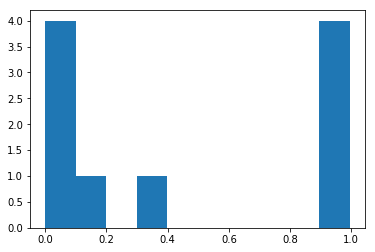

In [22]:
plt.hist(P[0]);

In [23]:
P[0]

array([  9.95139484e-01,   9.88871878e-01,   3.70961831e-01,
         1.76749682e-01,   1.68367342e-02,   7.21045970e-03,
         9.82587212e-01,   2.20842548e-03,   9.91721265e-01,
         6.33852469e-04])

## Neural net, step by step

**Step 5: Compute the loss:**

Mathematically, we'll compute mean squared error loss:

$$ L_1 = \frac{1}{2}(y - P_1)^2 $$

In [24]:
y = np.array(Y[i], ndmin=2)
L = 0.5 * (y - P) ** 2

In [25]:
L

array([[  4.95151297e-01,   4.88933795e-01,   6.88063402e-02,
          1.56202251e-02,   1.41737810e-04,   2.59953645e-05,
          4.82738815e-01,   4.97794013e-01,   4.91755533e-01,
          2.00884476e-07]])

# Backpropogation

We have made our prediction and computed our loss, $L$. Now what?

Recall: each "step" is just a function applied to some input that results in some output.

So, say we have a neural net with just one hidden layer. If the loss of a neural net on a given observation $ X $ is: 

$$ L = L(D(C(B(A(X, V)), W))) $$

we can use the chain rule the explicitly compute the loss with respect to each of the individual weights:

## The answer - possible to everything

The answer: we _want_ to change the weights in such a way that the loss will be reduced during the next iteration 

$$ W = W - \frac{\partial L}{\partial W}$$

$$ V = V - \frac{\partial L}{\partial V}$$

We'll compute these partial derivatives, of $L$ with respect to $V$ and $W$, using the chain rule, using the fact that:

$$ \frac{\partial L}{\partial V} = \frac{\partial A}{\partial V} * \frac{\partial B}{\partial A} * \frac{\partial C}{\partial B} * \frac{\partial P}{\partial C} * \frac{\partial L}{\partial P} $$

$$ \frac{\partial L}{\partial W} = \frac{\partial C}{\partial W} * \frac{\partial P}{\partial C} * \frac{\partial L}{\partial P} $$

_Note:_ These are matrix multiplications.

The incredible thing is that **_this will work because of the chain rule_**!


## Neural net, step by step

**Step 6: Backpropogate, step 1:**

$$ \frac{\partial L}{\partial P} = -1.0 * (y - P) $$

In [26]:
dLdP = -1.0 * (y-P)
dLdP

array([[  9.95139484e-01,   9.88871878e-01,   3.70961831e-01,
          1.76749682e-01,   1.68367342e-02,   7.21045970e-03,
          9.82587212e-01,  -9.97791575e-01,   9.91721265e-01,
          6.33852469e-04]])

## Neural net, step by step

**Step 7: Backpropogate, step 2:**

**Digression on the sigmoid function:**

If

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

Then 

$$\sigma'(x) = \sigma(x) * (1 - \sigma(x))$$

## Neural net, step by step

So, since:

$$ P = \sigma(C) $$

that means:

$$ \frac{\partial P}{\partial C} = \sigma(C) * (1 - \sigma(C)) $$

## Neural net, step by step

And by the chain rule (we'll use this over and over again):

$$ \frac{\partial L}{\partial C} = \frac{\partial L}{\partial P} * \frac{\partial P}{\partial C} $$
$$ \frac{\partial L}{\partial C} =  -1.0 * (y-P) * \sigma(C) * (1 - \sigma(C)) $$

In [27]:
dPdC = _sigmoid(C) * (1-_sigmoid(C))
dLdC = dLdP * dPdC
dLdC

array([[  4.81338124e-03,   1.08818301e-02,   8.65636284e-02,
          2.57187105e-02,   2.78702816e-04,   5.16158520e-05,
          1.68116573e-02,  -2.19868196e-03,   8.14222796e-03,
          4.01514290e-07]])

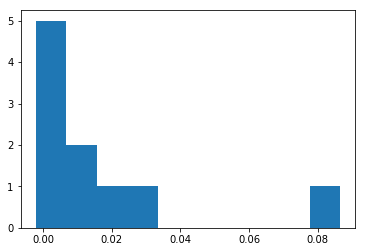

In [28]:
plt.hist(dLdC[0]);

## Neural net, step by step

**Step 8: Backpropogate, step 3:**

Recall that, in our simple example with only four neurons in the hidden layer:

$$ c_1 = w_{11} * b_1 + w_{21} * b_2 + w_{31} * b_3 + w_{41} * b_4 $$

This can also be written as:

$$ \begin{bmatrix}b_1 &&
                  b_2 &&
                  b_3 &&
                  b_4\end{bmatrix} * \begin{bmatrix}w_{11} \\
                  w_{21} \\
                  w_{31} \\
                  w_{41}
                  \end{bmatrix} $$

## Neural net, step by step

Now recall that by 

$$ \frac{\partial C}{\partial W} $$

we mean:

$$ \begin{bmatrix}\frac{\partial C}{\partial w_{11}} \\
                  \frac{\partial C}{\partial w_{21}} \\
                  \frac{\partial C}{\partial w_{31}} \\
                  \frac{\partial C}{\partial w_{41}}
                  \end{bmatrix} $$

## Neural net, step by step

But, looking at the formula for $C$, this is just 

$$ \begin{bmatrix}b_1 \\
                  b_2 \\
                  b_3 \\
                  b_4
                  \end{bmatrix} $$
                  
or $B^T$. 

Finally, then, we arrive at the elegant formula for the backpropogation at this stage:

$$ \frac{\partial C}{\partial W} = B^T$$

Similarly, we can show that:

$$ \frac{\partial C}{\partial B} = W^T$$

## Neural net, step by step

Looking at the weight updates themselves, we can see that most of them are quite small:

In [29]:
def hist_weight_update(update):
    plt.hist(update.reshape(update.shape[0] * update.shape[1]));

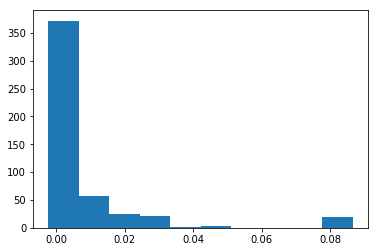

In [30]:
dCdW = B.T
dLdW = np.dot(dCdW, dLdC)
plt.hist(dLdW.reshape(W.shape[0] * W.shape[1]));

## Neural net, step by step

**Step 9: Backpropogate, step 4:**

Again, because:

$$ \frac{\partial C}{\partial B} = W^T $$

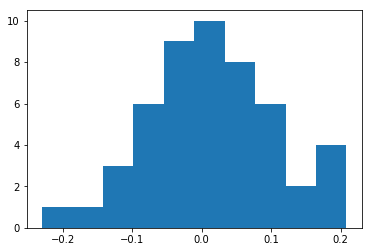

In [31]:
dCdB = W.T
dLdB = np.dot(dLdC, dCdB)
plt.hist(dLdB[0]);

## Neural net, step by step

**Step 10: backpropogate, step 5:**

As before, since:

$$ B = \sigma(A) $$

This means:

$$ \frac{\partial B}{\partial A} = \sigma(A) * (1 - \sigma(A)) $$

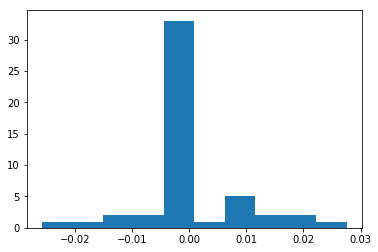

In [32]:
dBdA = _sigmoid(A) * (1-_sigmoid(A))
dLdA = dLdB * dBdA
plt.hist(dLdA[0]);

## Neural net, step by step

**Step 11: backpropogate, step 6:**

Now, recall that before, in our three input feature-four hidden feature example,

And we would actually do the transformation as follows:

$$ x_1 * v_{11} + x_2 * v_{21} + x_3 * v_{31} = a_1 $$
$$ x_1 * v_{12} + x_2 * v_{22} + x_3 * v_{32} = a_2 $$
$$ x_1 * v_{13} + x_2 * v_{23} + x_3 * v_{33} = a_3 $$
$$ x_1 * v_{14} + x_2 * v_{24} + x_3 * v_{34} = a_4 $$

## Neural net, step by step

So, we must calculate:

$$ \frac{\partial A}{\partial V} $$

which is really just syntax for:

$$ \begin{bmatrix}\frac{\partial A}{\partial v_{11}} & \frac{\partial A}{\partial v_{12}} & \frac{\partial A}{\partial v_{13}} & \frac{\partial A}{\partial v_{14}} \\
\frac{\partial A}{\partial v_{21}} & \frac{\partial A}{\partial v_{22}} & \frac{\partial A}{\partial v_{23}} & \frac{\partial A}{\partial v_{24}} \\
\frac{\partial A}{\partial v_{31}} & \frac{\partial A}{\partial v_{32}} & \frac{\partial A}{\partial v_{33}} & \frac{\partial A}{\partial v_{34}} \\
\end{bmatrix} $$

But, note that focusing on just $a_1$ for example:

## Neural net, step by step

$$ \frac{\partial a_1}{\partial v_{11}} = x_1 $$
$$ \frac{\partial a_1}{\partial v_{21}} = x_2 $$
$$ \frac{\partial a_1}{\partial v_{31}} = x_3 $$

whereas for $a_2$ and $a_3$

$$ \frac{\partial a_2}{\partial v_{11}} = 0 $$
$$ \frac{\partial a_3}{\partial v_{11}} = 0 $$


## Neural net, step by step

So if we write: 
    
$$ A = \begin{bmatrix}a_1 \\ a_2 \\ a_3 \\ a_4 \end{bmatrix} $$

Then:

$$ \frac{\partial A}{\partial V} = \begin{bmatrix}
   \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} &
   \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} &
   \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} &
   \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}\end{bmatrix} $$

Which in terms of the matrix multiplication that results is the same as writing just:

$$ \frac{\partial A}{\partial V} = X^T $$

## Neural net, step by step

In [33]:
dAdV = x.T
dLdV = np.dot(dAdV, dLdA)
dLdV.shape

(784, 50)

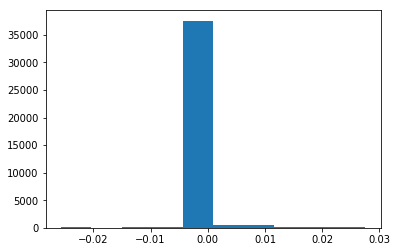

In [34]:
hist_weight_update(dLdV);

## Neural net, step by step

**Step 12: Update the weights:**

Now, the following "works" because of the chain rule:

$$ \frac{\partial L}{\partial W} = \frac{\partial L}{\partial P} * 
\frac{\partial P}{\partial C} *
\frac{\partial C}{\partial W}$$

$$ \frac{\partial L}{\partial V} = \frac{\partial L}{\partial P} * 
\frac{\partial P}{\partial C} *
\frac{\partial C}{\partial B} * 
\frac{\partial B}{\partial A} * 
\frac{\partial A}{\partial W} $$

## Neural net, step by step

Finally, we update the weights!

$$ W = W - \frac{\partial L}{\partial W} $$

$$ V = V - \frac{\partial L}{\partial V} $$

In [35]:
W -= dLdW
V -= dLdV

# Training the net for one epoch:

In [36]:
# Randomly shuffle the indices of the points in the training set:
np.random.seed(2)
train_size = X_train.shape[0]
indices = list(range(train_size))
np.random.shuffle(indices)

In [37]:
def learn(X, Y, start_index, num_iter, V=None, W=None, num_epoch=1):
    np.random.seed(3)
    if V is None:
        V = np.random.randn(784, 50)
    if W is None:
        W = np.random.randn(50, 10)
    for j in range(start_index, start_index + num_iter):
        i = indices[j]
        x = np.array(X[i], ndmin=2)
        y = np.array(Y[i], ndmin=2)
        A = np.dot(x,V)
        B = _sigmoid(A)
        C = np.dot(B,W)
        P = _sigmoid(C)
        L = 0.5 * (y - P) ** 2
        dLdP = -1.0 * (y - P)
        dPdC = _sigmoid(C) * (1-_sigmoid(C))
        dLdC = dLdP * dPdC
        dCdW = B.T
        dLdW = np.dot(dCdW, dLdC)
        dCdB = W.T
        dLdB = np.dot(dLdC, dCdB)
        dBdA = _sigmoid(A) * (1-_sigmoid(A))
        dLdA = dLdB * dBdA
        dAdV = x.T
        dLdV = np.dot(dAdV, dLdA)
        W -= dLdW
        V -= dLdV
    return V, W

## Training the net for one epoch:

In [38]:
def predict(X, V, W):
    A = np.dot(X,V)
    B = _sigmoid(A)
    C = np.dot(B,W)
    P = _sigmoid(C)
    return P

In [39]:
def accuracy(P, Y_test, loss=False):
    preds = [np.argmax(x) for x in P]
    actuals = [np.argmax(x) for x in Y_test]
    
    accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)

    if loss:
        loss_vector = [prob - obs for prob, obs in zip(P, Y_test)]
        squared_loss = [x ** 2 for x in loss_vector]
        total_loss = np.mean([np.sum(x) for x in squared_loss])
        return accuracy, total_loss

    return accuracy

## Turning this into a function:

In [40]:
df_data = pd.DataFrame(index=[0], columns=['iterations', 
                                           'test_accuracy',
                                           'train_accuracy', 
                                           'test_loss'])
train_size = X_train.shape[0]
num_iter=1000
num_iter_total = 0
for i in range(int(train_size / num_iter)):
    if i == 0:
        V, W = learn(X_train, Y_train, num_iter_total, num_iter, V=None, W=None)
    else:
        V, W = learn(X_train, Y_train, num_iter_total, num_iter, V=V, W=W)
        
    P_test = predict(X_test, V, W)
    P_train = predict(X_train, V, W)
    test_accuracy, test_loss = accuracy(P_test, Y_test, loss=True)
    if (num_iter_total - num_iter) % 10000 == 0:
        print("Loss after", num_iter_total, 
              "iterations is", np.round(test_loss, 3))
    train_accuracy = accuracy(P_train, Y_train)
    num_iter_total += num_iter
    df_data.loc[i, :] = [num_iter_total,
                         test_accuracy,
                         train_accuracy, 
                         test_loss]    

Loss after 1000 iterations is 0.787
Loss after 11000 iterations is 0.259
Loss after 21000 iterations is 0.197


KeyboardInterrupt: 

In [50]:
W

array([[ -7.18761075e-01,   1.19024301e+00,  -8.15048556e-01,
          4.14556658e-01,   2.48226954e+00,  -1.51820309e+00,
          3.65598413e-01,  -6.72476416e-01,   2.51923172e-01,
         -3.49922587e+00],
       [ -4.85761242e-01,   4.46685745e-01,  -1.47967103e+00,
         -1.42727480e+00,  -2.75572731e-01,   7.38395432e-01,
          2.64547049e+00,  -5.98152830e-01,   7.23225775e-01,
          1.01407038e+00],
       [  1.98694422e+00,  -1.65559611e+00,  -7.40598649e-01,
          3.15447258e-01,  -2.22354742e+00,  -6.47585823e-01,
         -2.19235496e+00,   2.64783467e+00,  -3.75230747e+00,
         -7.50152163e-01],
       [ -2.31096802e+00,  -1.61609469e+00,  -1.20768255e+00,
         -6.95650501e-01,  -2.19826461e+00,   1.79890777e+00,
          2.04186884e+00,  -7.61651936e-01,  -3.60414837e-01,
          2.77235807e-01],
       [ -1.13103059e+00,   8.54020801e-01,  -1.18097147e+00,
         -1.46526676e+00,   4.09547763e-01,   4.13270102e-01,
         -6.55398295e-01

In [45]:
df_data.head()

,iterations,test_accuracy,train_accuracy,test_loss
0,1000,0.316429,0.318762,0.827367
1,2000,0.335429,0.339206,0.786708
2,3000,0.505,0.493349,0.621605
3,4000,0.541,0.533365,0.586957
4,5000,0.534571,0.529349,0.588969


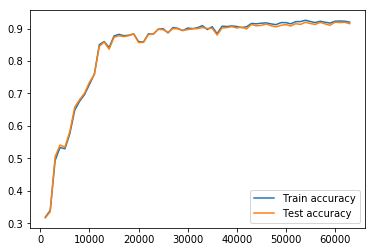

In [46]:
plt.plot(df_data.iterations, df_data.train_accuracy)
plt.plot(df_data.iterations, df_data.test_accuracy);
plt.legend(['Train accuracy', 'Test accuracy'])

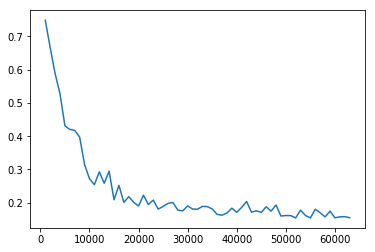

In [108]:
plt.plot(df_data.iterations, df_data.test_loss);

# One layer baseline

In [90]:
def learn_one_layer(X, Y, start_index, num_iter, W=None, num_epoch=1):
    np.random.seed(3)
    if W is None:
        W = np.random.randn(784, 10)
    for j in range(start_index, start_index + num_iter):
        i = indices[j]
        x = np.array(X[i], ndmin=2)
        y = np.array(Y[i], ndmin=2)
        A = np.dot(x,W)
        P = _sigmoid(A)
        L = 0.5 * (y - P) ** 2
        iteration_loss = np.sum(L)
        dLdP = -1.0 * (y - P)
        dPdA = _sigmoid(A) * (1-_sigmoid(A))
        dLdA = dLdP * dPdA
        dAdW = x.T
        dLdW = np.dot(dAdW, dLdA)
        W -= dLdW
    return W

In [91]:
def predict_one_layer(X, W):
    A = np.dot(X,W)
    P = _sigmoid(A)
    return P

## Testing one layer baseline

In [93]:
df_data = pd.DataFrame(index=[0], columns=['iterations', 
                                           'test_accuracy',
                                           'train_accuracy', 
                                           'test_loss'])
train_size = X_train.shape[0]
num_iter=1000
num_iter_total = 0
for i in range(int(train_size / num_iter)):
    if i == 0:
        W = learn_one_layer(X_train, Y_train, num_iter_total, num_iter, W=None)
    else:
        W = learn_one_layer(X_train, Y_train, num_iter_total, num_iter, W=W)
        
    P_test = predict_one_layer(X_test, W)
    P_train = predict_one_layer(X_train, W)
    test_accuracy, test_loss = accuracy(P_test, Y_test, loss=True)
    if (num_iter_total - num_iter) % 10000 == 0:
        print("Loss after", num_iter_total, 
              "iterations is", np.round(test_loss, 3))
    train_accuracy = accuracy(P_train, Y_train)
    num_iter_total += num_iter
    df_data.loc[i, :] = [num_iter_total,
                         test_accuracy,
                         train_accuracy, 
                         test_loss]    

Loss after 1000 iterations is 0.921
Loss after 11000 iterations is 0.773
Loss after 21000 iterations is 0.757
Loss after 31000 iterations is 0.646
Loss after 41000 iterations is 0.611
Loss after 51000 iterations is 0.604
Loss after 61000 iterations is 0.592


In [112]:
df_data.head()

,iterations,test_accuracy,train_accuracy,test_loss
0,1000,0.368571,0.365333,0.748181
1,2000,0.465286,0.466016,0.665888
2,3000,0.549714,0.548937,0.587754
3,4000,0.613143,0.617317,0.526804
4,5000,0.676143,0.676095,0.431068


## Testing one layer baseline

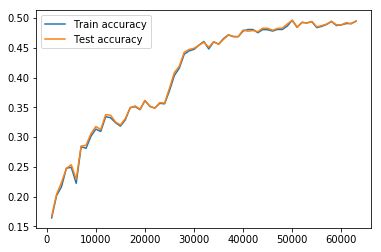

In [95]:
plt.plot(df_data.iterations, df_data.train_accuracy)
plt.plot(df_data.iterations, df_data.test_accuracy);
plt.legend(['Train accuracy', 'Test accuracy'])

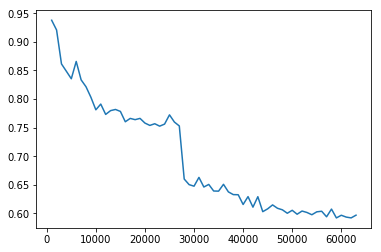

In [96]:
plt.plot(df_data.iterations, df_data.test_loss);

Note: you can get [92% accuracy on MNIST using Logistic Regression](https://www.tensorflow.org/get_started/mnist/beginners). In this case, we didn't let our net run long enough for the accuracy to get that high. I ran the net for one epoch just to have an apples-to-apples comparision between this an a neural net with one hidden layer.

# Understanding the hidden nodes

Let's try to understand what the 50 "hidden" nodes in our two layer neural network are actually doing. We'll look at the number 4, since that was the number of the image we randomly chose earlier:

In [109]:
def subset_number(number, X_test, Y_test):
    actuals = [np.argmax(x) for x in Y_test]
    indices_number = [x == number for x in actuals]
    
    X_test_subset = X_test[indices_number]
    Y_test_subset = Y_test[indices_number]
    
    return X_test_subset, Y_test_subset

In [110]:
x4, y4 = subset_number(4, X_test, Y_test)

## Understanding the hidden nodes

Let's look at the absolute values of the weights going from the hidden layer to neuron that determines whether an image will be predicted to be a "4":

In [111]:
np.abs(W[:, 4])

array([ 0.99449417,  1.98429933,  2.82371716,  3.48010878,  2.2579907 ,
        0.64772248,  1.17105235,  2.33184894,  0.2572024 ,  1.42756439,
        1.18732571,  0.21992582,  2.30523504,  0.38174461,  2.38507171,
        1.76656724,  2.20976963,  3.12920179,  0.82623126,  3.26569253,
        1.1344759 ,  2.07066254,  3.0663163 ,  0.46234842,  2.56397739,
        1.82419642,  0.43266411,  0.49476118,  1.61181721,  0.36083657,
        7.69405401,  0.42256854,  2.02203338,  1.48895161,  1.18299701,
        1.98468393,  0.73821824,  3.40928235,  2.79826419,  0.08400399,
        1.38695132,  0.5522375 ,  4.43110294,  0.28233517,  1.0401166 ,
        0.19656483,  3.94314668,  0.90369211,  2.98258685,  0.28211424])

This next function tells us which argument which of these 50 neurons have the highest values:

In [114]:
np.argsort(np.abs(W[:, 4]))[::-1]

array([30, 42, 46,  3, 37, 19, 17, 22, 48,  2, 38, 24, 14,  7, 12,  4, 16,
       21, 32, 35,  1, 25, 15, 28, 33,  9, 40, 10, 34,  6, 20, 44,  0, 47,
       18, 36,  5, 41, 27, 23, 26, 31, 13, 29, 43, 49,  8, 11, 45, 39])

So, "neuron 30" is the most important neuron for determining whether a number is a "4" or not.

## Understanding the hidden nodes

Let's visualize an "average 4" just so we know what we're trying to predict:

In [119]:
def visualize_average_number(number):
    x_number = subset_number(number, X_test, Y_test)[0]
    mean_number = x_number.mean(axis=0)
    plt.imshow(1.0 - mean_number.reshape(28,28), cmap='gray')

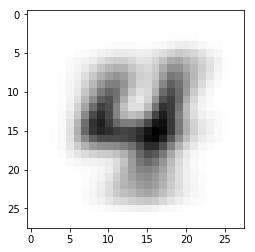

In [120]:
visualize_average_number(4)

## Understanding the hidden nodes

Now, let's visualize the _weights_ connected to the hidden nodes that contribute most to determining whether an image is a "4" or not.

In [121]:
def visualize_hidden(index):
    plt.imshow(1.0 - V[:, index].reshape(28,28), cmap='gray')

## Understanding the hidden nodes

The most common influential hidden cell:

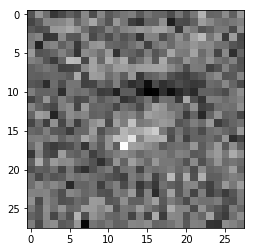

In [122]:
visualize_hidden(30)

The second and third most influential:

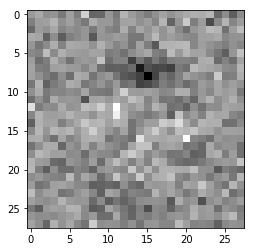

In [324]:
visualize_hidden(42)

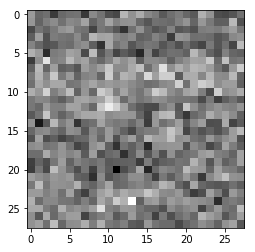

In [325]:
visualize_hidden(46)